In [1]:
%matplotlib inline

In [13]:
mu = np.array([1/6]*6)
rv = sp.stats.multinomial(1, mu)

In [15]:
xx = np.arange(1,6+1)
xx_ohe = pd.get_dummies(xx) # 이항변수화(binarization)는 '0'과 '1'의 값만을 가지는 가변수(dummy variable)를 만드는 것을 의미한다.
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


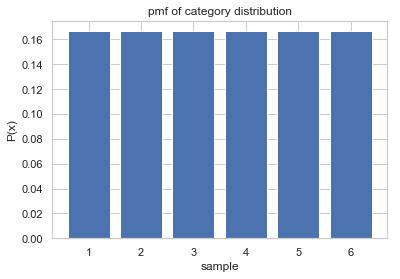

In [16]:
plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("sample")
plt.title("pmf of category distribution")
plt.show()

In [32]:
np.random.seed(1)
x = rv.rvs(10000)
x[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

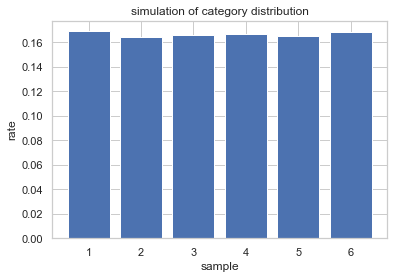

In [37]:
y = x.sum(axis=0) / float(len(x))
plt.bar(np.arange(1, 7), y)
plt.title("simulation of category distribution")
plt.xlabel("sample")
plt.ylabel("rate")
plt.show()

In [38]:
df = pd.DataFrame({"theory": rv.pmf(xx_ohe.values), "simulation": y}, index = np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["sample", "type", "rate"]
df.pivot("sample", "type", "rate")
df

,sample,type,rate
0,1,theory,0.166667
1,1,simulation,0.169100
2,2,theory,0.166667
3,2,simulation,0.164300
4,3,theory,0.166667
5,3,simulation,0.166400
6,4,theory,0.166667
7,4,simulation,0.167200
8,5,theory,0.166667
9,5,simulation,0.164800


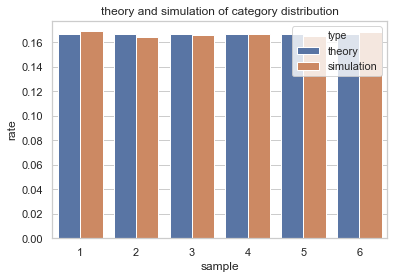

In [39]:
sns.barplot(x="sample", y="rate", hue="type", data=df)
plt.title("theory and simulation of category distribution")
plt.show()